In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

In [2]:
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
insurance_dataset.replace({'sex':{'female':0,'male':1},'smoker':{'no':0,'yes':1},'region':{'southeast':0,'southwest':1, 'northwest':2, 'northeast':3}},inplace=True)

In [8]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [9]:
X = insurance_dataset.drop(columns = 'charges', axis = 1)
Y = insurance_dataset['charges']

In [10]:
print(X.shape,Y.shape)

(1338, 6) (1338,)


In [11]:
#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [13]:
#Model Training with LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [14]:
#Model Eval on train data
#R squared error
linear_training_data_prediction = linear_model.predict(X_train)
r_square_train = metrics.r2_score(Y_train, linear_training_data_prediction)
print('R Squared Error:', r_square_train)

#Mean Absolute Error
linear_MAE_train = metrics.mean_absolute_error(Y_train, linear_training_data_prediction)
print('Mean Absolute error:', linear_MAE_train)


R Squared Error: 0.7455011562008446
Mean Absolute error: 4169.471463267863


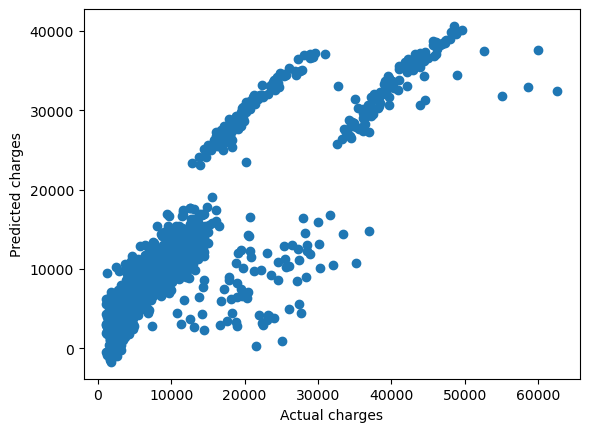

In [15]:
plt.scatter(Y_train, linear_training_data_prediction)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show()

In [16]:
#Model Eval on test data
#R squared error
linear_test_data_prediction = linear_model.predict(X_test)
r_square_test = metrics.r2_score(Y_test, linear_test_data_prediction)
print('R Squared Error:', r_square_test)

# Mean Absolute error for test data
linear_MAE_test = metrics.mean_absolute_error(Y_test, linear_test_data_prediction)
print('Mean Absolute error:', linear_MAE_test)

R Squared Error: 0.7678015486631006
Mean Absolute error: 4187.613210222991


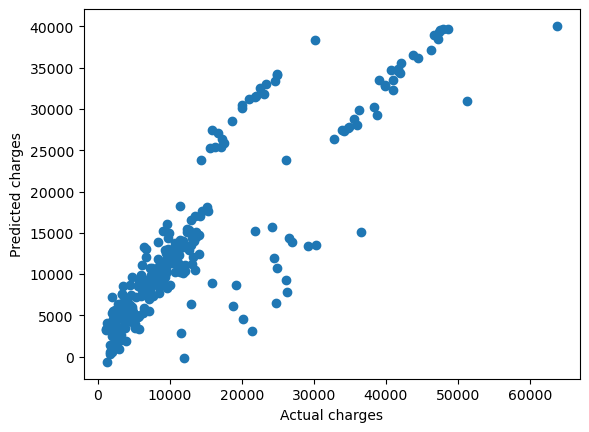

In [17]:
plt.scatter(Y_test, linear_test_data_prediction)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show()

In [18]:
#Model Training on RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators = 1000)
random_forest_reg.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=1000)

In [19]:
forest_training_data_prediction = random_forest_reg.predict(X_train)
forest_r_square_train = metrics.r2_score(Y_train, forest_training_data_prediction)
print('R Squared Error:', forest_r_square_train)

#Mean Absolute Error
forest_MAE_train = metrics.mean_absolute_error(Y_train, forest_training_data_prediction)
print('Mean Absolute error:', forest_MAE_train)

R Squared Error: 0.9777785297725374
Mean Absolute error: 977.3531535502647


In [20]:
forest_test_data_prediction = random_forest_reg.predict(X_test)
forest_r_square_test = metrics.r2_score(Y_test, forest_test_data_prediction)
print('R Squared Error:', forest_r_square_test)

#Mean Absolute Error
forest_MAE_test = metrics.mean_absolute_error(Y_test, forest_test_data_prediction)
print('Mean Absolute error:', forest_MAE_test)

R Squared Error: 0.8523358880128546
Mean Absolute error: 2556.393536393431


Text(0, 0.5, 'Charges')

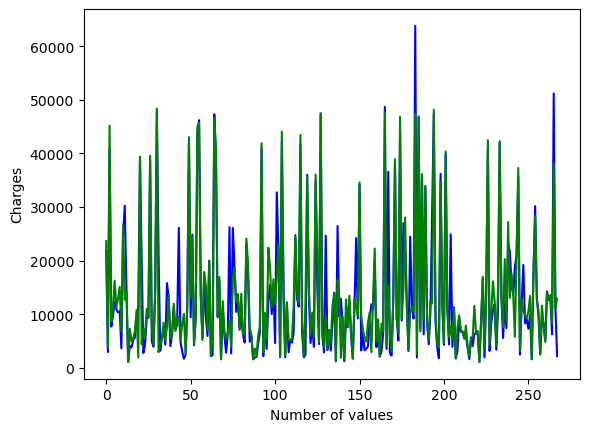

In [21]:
Y_test = list(Y_test)
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(forest_test_data_prediction, color = 'green', label = 'Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('Charges')

Predictive System

In [24]:
linear_input_data = (22,1,35.6,0,1,1)
#convert to numpy array
linear_input_data_as_numpy_array = np.asarray(linear_input_data)
#reshape the numpy array as we are predicting for one instance
linear_input_data_reshape = linear_input_data_as_numpy_array.reshape(1,-1)
linear_prediction = linear_model.predict(linear_input_data_reshape)
print('Linear model charge prediction:', linear_prediction)

Linear model charge prediction: [28773.90666038]


C:\Users\Zooby\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
random_forest_input_data = (22,1,35.6,0,1,1)
#convert to numpy array
random_forest_input_data_as_numpy_array = np.asarray(random_forest_input_data)
#reshape the numpy array as we are predicting for one instance
random_forest_input_data_reshape = random_forest_input_data_as_numpy_array.reshape(1,-1)
random_forest_prediction = random_forest_reg.predict(random_forest_input_data_reshape)
print('Random Forest prediction:',random_forest_prediction)

Random Forest prediction: [37296.85222248]


C:\Users\Zooby\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


##### Random Forest model is more accurate than Linear Regression model